In [1]:
import os

import pandas as pd, numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("plots"):
    os.mkdir("plots")

Set flags to decide whether to generate plots for each experiment.

In [2]:
sim_1 = True
sim_2 = True
mit_1 = True
mit_2 = True
scans = ['neg', 'pos']
scan_types = ['negative', 'positive']

In [3]:
# Generate Theoretical Lambda Cutoffs
def gen_lambda_cutoff(k):
    if k == 0:
        return 50
    else:
        return (75/k)*(4999-k**2)/(7497-k**2)
    
def get_color():
    return (np.random.rand(), np.random.rand(), np.random.rand())

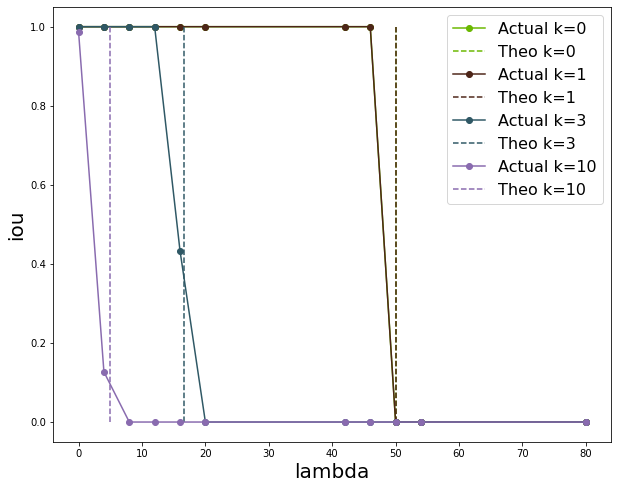

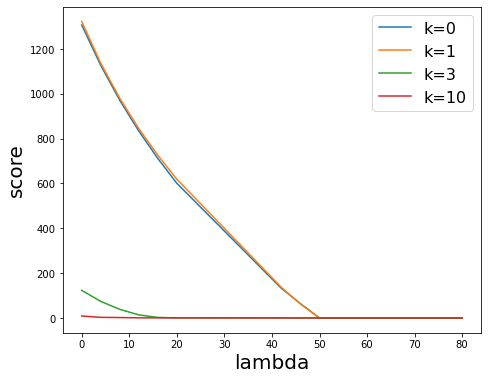

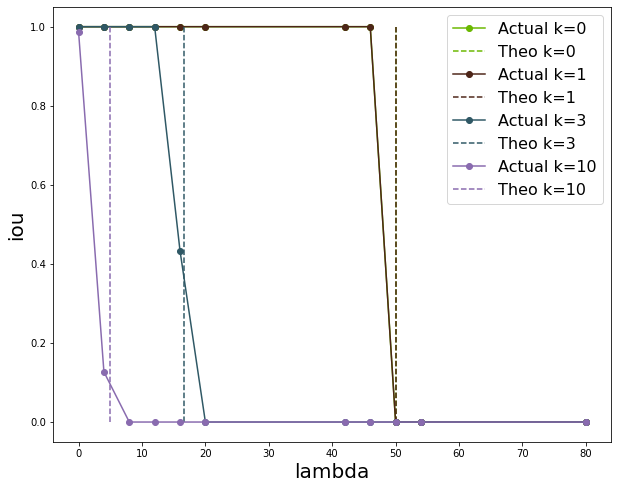

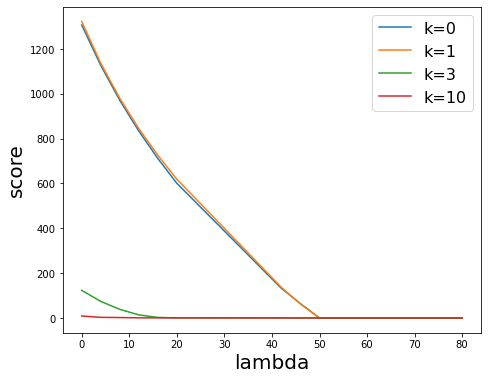

In [4]:
if sim_1:
    for scan in scans:
        vals = [0, 1, 3, 10]
        compas_sim_1_df = pd.read_csv("datasets/compas_sim_1_" + scan + ".csv")
        compas_sim_1_df = compas_sim_1_df.loc[compas_sim_1_df['k'].isin(vals)]

        group_df = compas_sim_1_df.groupby(['k', 'lambda']).mean().reset_index()
        iou_df = group_df[['k', 'lambda', 'iou']]
        score_df = group_df[['k', 'lambda', 'score']]
        k_vals = list(set(list(group_df['k'])))
        k_vals.sort()
        
        # Generate theoretical lambda cutoffs
        theo_0_df = pd.DataFrame(k_vals, columns=['k'])
        theo_0_df['lambda'] = theo_0_df['k'].apply(lambda k : gen_lambda_cutoff(k))
        theo_1_df = theo_0_df.copy(deep=True)
        theo_0_df['iou'] = 0
        theo_1_df['iou'] = 1
        theo_df = theo_0_df.append(theo_1_df)
        
        # Plot iou curves
        np.random.seed(1) # Set random seed for generating colors on plot
        iou_fig = plt.figure(figsize=(10, 8))
        k_vals = list(set(list(group_df['k'])))
        k_vals.sort()
        for k in k_vals:
            iou_k_df = iou_df.loc[iou_df['k'] == k]
            theo_k_df = theo_df.loc[theo_df['k'] == k]
            color = get_color()
            plt.plot(iou_k_df['lambda'], iou_k_df['iou'], label='Actual k={}'.format(k), color=color, marker='o')
            plt.plot(theo_k_df['lambda'], theo_k_df['iou'], label='Theo k={}'.format(k), color=color, linestyle='dashed')
        # plt.title("Detection: Actual vs. Theoretical Lambda Cutoffs", fontsize=24)
        plt.xlabel("lambda", fontsize=20)
        plt.ylabel("iou", fontsize=20)
        plt.legend(loc=1, prop={'size': 16})
        iou_fig.savefig("plots/compas_sim_1_" + scan + "_iou.png", format="png")
        # plt.show()
        
        # Plot score curves
        score_fig = plt.figure(figsize=(7.5, 6))
        for k in k_vals:
            score_k_df = score_df.loc[score_df['k'] == k]
            plt.plot(score_k_df['lambda'], score_k_df['score'], label='k={}'.format(k))
        # plt.title("Score as a Function of Lambda", fontsize=24)
        plt.xlabel("lambda", fontsize=20)
        plt.ylabel("score", fontsize=20)
        plt.legend(loc=1, prop={'size': 16})
        score_fig.savefig("plots/compas_sim_1_" + scan + "_score.png", format="png")
        # plt.show()

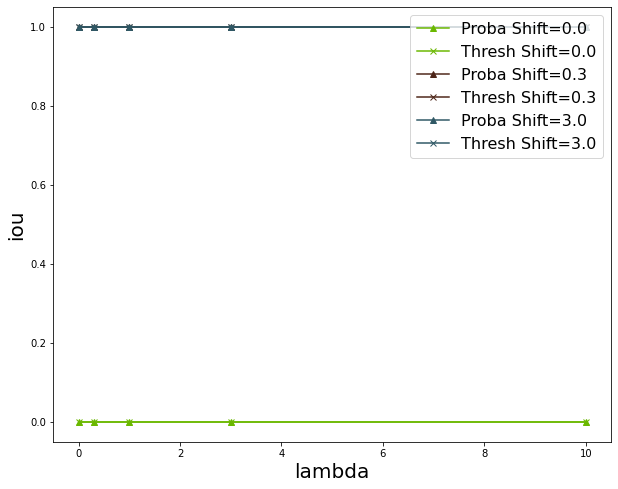

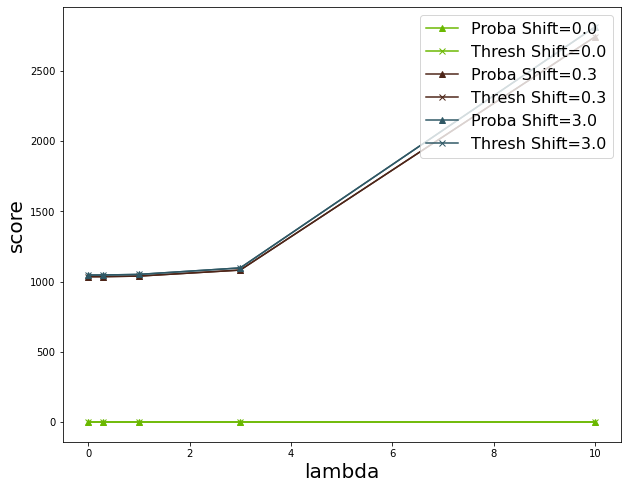

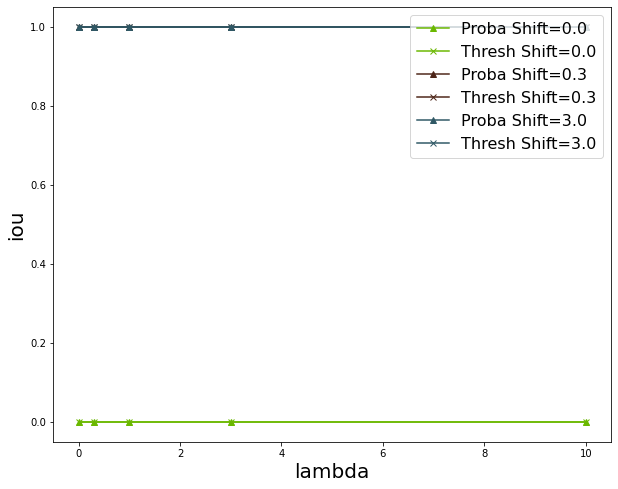

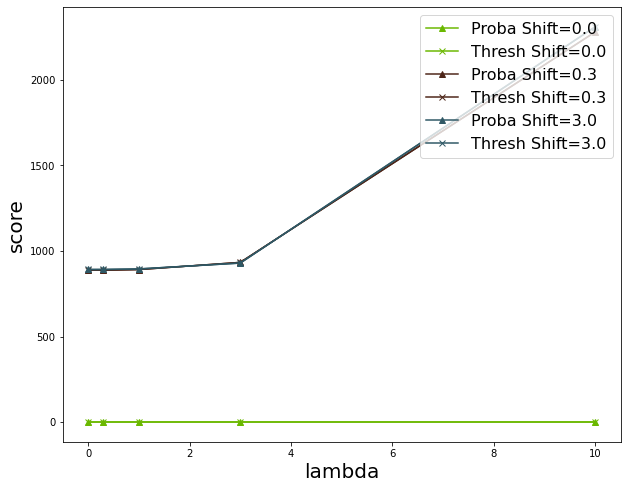

In [5]:
if sim_2:
    for scan in scans:
        vals = [0, 0.3, 3]
        compas_sim_2_df = pd.read_csv("datasets/compas_sim_2_" + scan + ".csv")
        compas_sim_2_df = compas_sim_2_df.loc[compas_sim_2_df['e'].isin(vals)]
        
        group_df = compas_sim_2_df.groupby(['e', 'lambda']).mean().reset_index()
        
        # plot iou curves
        np.random.seed(1) # Set random seed for generating colors on plot
        iou_fig = plt.figure(figsize=(10, 8))
        e_vals = list(set(list(group_df['e'])))
        e_vals.sort()
        for e in e_vals:
            iou_e_df = group_df.loc[group_df['e'] == e]
            color = get_color()
            plt.plot(iou_e_df['lambda'], iou_e_df['proba_shift_iou'], label='Proba Shift={}'.format(e), color=color, marker='^')
            plt.plot(iou_e_df['lambda'], iou_e_df['threshold_shift_iou'], label='Thresh Shift={}'.format(e), color=color, marker='x')
        # plt.title("Detection: Probability Shift vs. Threshold Shift", fontsize=24)
        plt.xlabel("lambda", fontsize=20)
        plt.ylabel("iou", fontsize=20)
        plt.legend(loc=1, prop={'size': 16})
        iou_fig.savefig("plots/compas_sim_2_" + scan + "_iou.png", format="png")
        # plt.show()
        
        # plot score curves
        np.random.seed(1)
        score_fig = plt.figure(figsize=(10, 8))
        e_vals = list(set(list(group_df['e'])))
        e_vals.sort()
        for e in e_vals:
            score_e_df = group_df.loc[group_df['e'] == e]
            color = get_color()
            plt.plot(score_e_df['lambda'], score_e_df['proba_shift_score'], label='Proba Shift={}'.format(e), color=color, marker='^')
            plt.plot(score_e_df['lambda'], score_e_df['threshold_shift_score'], label='Thresh Shift={}'.format(e), color=color, marker='x')

        # plt.title("Score: Probability Shift vs. Threshold Shift", fontsize=24)
        plt.xlabel("lambda", fontsize=20)
        plt.ylabel("score", fontsize=20)
        plt.legend(loc=1, prop={'size': 16})
        score_fig.savefig("plots/compas_sim_2_" + scan + "_score.png", format="png")

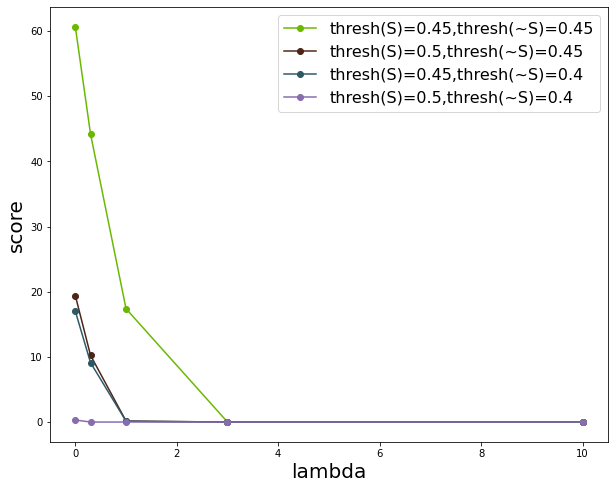

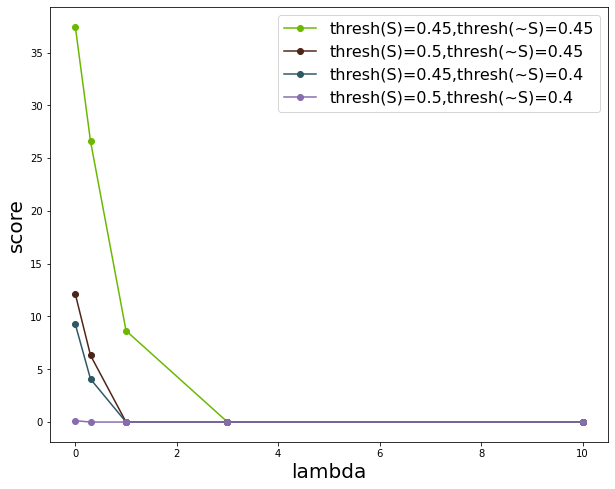

In [6]:
if mit_1:
    for scan_type in scan_types:
        compas_mit_1_df = pd.read_csv("datasets/compas_mit_1" + ".csv")
        compas_mit_1_df = compas_mit_1_df.loc[compas_mit_1_df['scan_type'] == scan_type]
        
        group_df = compas_mit_1_df.groupby(['threshold_aa', 'threshold_other', 'lambda']).mean().reset_index()
        
        # plot score curves
        np.random.seed(1)
        score_fig = plt.figure(figsize=(10, 8))
        thresholds = [(0.45, 0.45), (0.5, 0.45), (0.45, 0.4), (0.5, 0.4)]
        for th in thresholds:
            score_th_df = group_df.loc[(group_df['threshold_aa'] == th[0]) & (group_df['threshold_other'] == th[1])]
            color = get_color()
            plt.plot(score_th_df['lambda'], score_th_df['score'], label='thresh(S)={},thresh(~S)={}'.format(th[0], th[1]), color=color, marker='o')

        # plt.title("Score vs. Lambda for Mitigation 1", fontsize=24)
        plt.xlabel("lambda", fontsize=20)
        plt.ylabel("score", fontsize=20)
        plt.legend(loc=1, prop={'size': 16})
        score_fig.savefig("plots/compas_mit_1_" + scan_type[:3] + "_score.png", format="png")
        # plt.show()

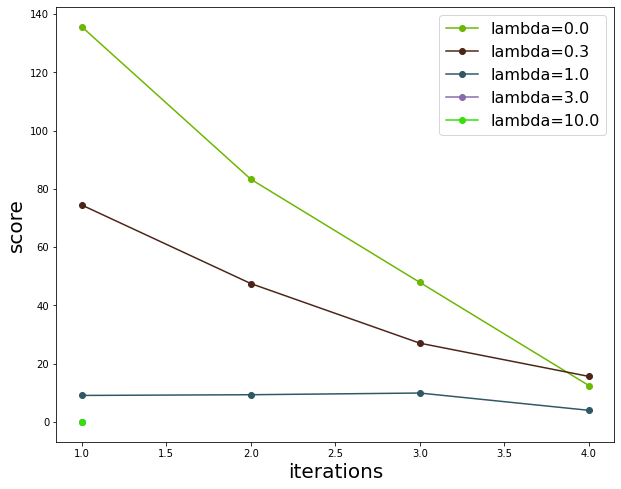

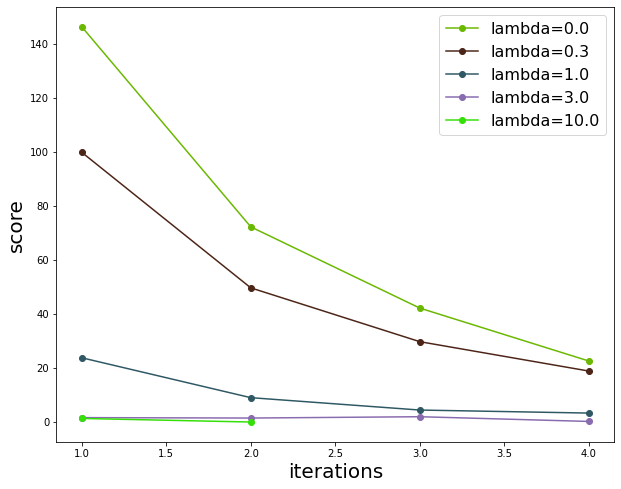

In [7]:
if mit_2:
    for scan_type in scan_types:
        compas_mit_2_df = pd.read_csv("datasets/compas_mit_2_" + scan_type[:3] + ".csv")
        compas_mit_2_df = compas_mit_2_df.loc[compas_mit_2_df['scan_type'] == scan_type]
        
        group_df = compas_mit_2_df.groupby(['lambda', 'iteration']).mean().reset_index()
    
        # plot score curves
        np.random.seed(1)
        score_fig = plt.figure(figsize=(10, 8))
        lambda_vals = list(set(list(group_df['lambda'])))
        lambda_vals.sort()
        for lambda_val in lambda_vals:
            score_lambda_df = group_df.loc[group_df['lambda'] == lambda_val]
            color = get_color()
            plt.plot(score_lambda_df['iteration'], score_lambda_df['score'], label='lambda={}'.format(lambda_val), color=color, marker='o')

        # plt.title("Score vs. iterations for Mitigation 1", fontsize=24)
        plt.xlabel("iterations", fontsize=20)
        plt.ylabel("score", fontsize=20)
        plt.legend(loc=1, prop={'size': 16})
        score_fig.savefig("plots/compas_mit_2_" + scan_type[:3] + "_score.png", format="png")
        # plt.show()